# Data Mining Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from math import ceil

In [2]:
df = pd.DataFrame(pd.read_csv('./gw_data/donors.csv'))

In [3]:
df.shape

(95412, 476)

## Distribution of Features

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title("Histogram of '{var_name}' by DV Category'".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

## Find Outliers

In [5]:
def find_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_values

### Outlier removal using only the IQR method

# First group of columns (Donor's Characteristics)

In [6]:
DonorCharactdf = df[['CONTROLN','TCODE','DOB','GENDER','NUMCHLD','INCOME']]
DonorCharactdf.set_index('CONTROLN', inplace=True)
DonorCharactdf

,TCODE,DOB,GENDER,NUMCHLD,INCOME
CONTROLN,,,,,
95515,0,1957-12-01,F,NaN,NaN
148535,1,1972-02-01,M,1.0,6.0
15078,1,NaN,M,NaN,3.0
172556,0,1948-01-01,F,NaN,1.0
7112,0,1940-01-01,F,1.0,3.0
...,...,...,...,...,...
184568,1,NaN,M,NaN,NaN
122706,1,1970-01-01,M,1.0,7.0
189641,1,1958-01-01,M,NaN,NaN


In [7]:
DonorCharactdf.dtypes

TCODE        int64
DOB         object
GENDER      object
NUMCHLD    float64
INCOME     float64
dtype: object

## Getting the Age of every donor

In [8]:
#converting the DOB column to datetime type
parsed_dates = pd.to_datetime(DonorCharactdf.DOB, format='%Y-%m-%d' , errors='coerce') #errors='coerce' meant to return NaN in case of exception
DonorCharactdf['DOB'] = parsed_dates

In [9]:
#Getting the age of every donor today
DonorCharactdf['Age'] = ((pd.datetime.today() - DonorCharactdf['DOB']).dt.days/365).floordiv(other=1).astype('int',errors='ignore')

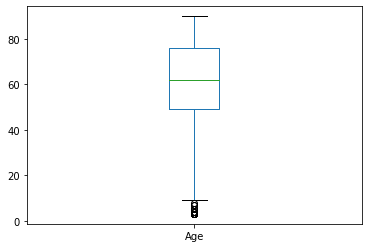

In [10]:
DonorCharactdf['Age'].plot.box()
#here we can see that we have outliers 

In [65]:
# Compute the IQR
# CODE HERE
q1= DonorCharactdf.quantile(0.25).Age
q3= DonorCharactdf.quantile(0.75).Age
Iqr = q3 - q1

# Compute upper and lower limit (lower_limit = Q1 -1.5*IQR | upper_limit = Q3 + 1.5*IQR)
lower_lim = q1 - 1.5*Iqr
upper_lim = q3 + 1.5*Iqr

initial_len = DonorCharactdf.shape[0]

DonorCharactdf = DonorCharactdf[~(DonorCharactdf['Age'] < lower_lim) | (DonorCharactdf['Age'] > upper_lim)]

len_afterremov = DonorCharactdf.shape[0]

print('Percentage of data kept after removing outliers:', np.round(len_afterremov / initial_len, 4))

Percentage of data kept after removing outliers: 0.9998


## NUMCHILD

In [11]:
print(DonorCharactdf.isnull().sum())
#too many null values for Number of Childrens so we will drop that column
DonorCharactdf.drop('NUMCHLD',inplace=True,axis = 1)

TCODE          0
DOB        23883
GENDER         0
NUMCHLD    83026
INCOME     21286
Age        23883
dtype: int64


## GENDER

In [12]:
#checking all the values for the Gender
#M = Male
#F = Female
#U = Unknown
#J = Joint Account
print(DonorCharactdf['GENDER'].unique())

#replacing unknown values to 'U'
DonorCharactdf['GENDER'].replace(' ','U',inplace=True)
DonorCharactdf['GENDER'].replace('A','U',inplace=True)
DonorCharactdf['GENDER'].replace('C','U',inplace=True)

#checking the difference
print(DonorCharactdf['GENDER'].unique())

['F' 'M' ' ' 'C' 'U' 'J' 'A']
['F' 'M' 'U' 'J']


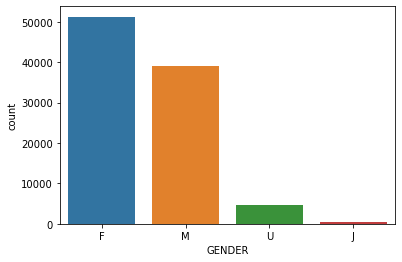

In [13]:
sns.countplot(x=DonorCharactdf['GENDER'])
plt.show()

## INCOME

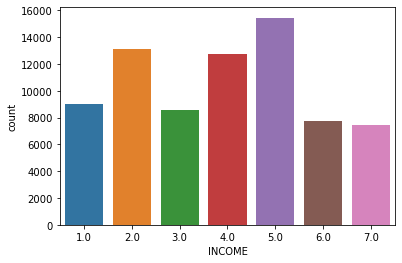

In [15]:
#get a distribution of the income
sns.countplot(x = DonorCharactdf['INCOME'])
plt.show()

# Donor's Interests

In [58]:
InterestsDf = df.loc[:, 'COLLECT1':'PLATES']
InterestsDf

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,,,
3,,,,,,,,,,,,,,,,,,
4,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,,,,,,,,,,,,,,,,,,
95408,,,,,,,,,,,,,,,,,,
95409,,,,,,,,,,,,,,,,,,
95410,,,,,,,,,,,,,,,,,,


In [78]:
InterestsDf = InterestsDf.replace(' ',0)
InterestsDf = InterestsDf.replace('Y',1)
InterestsDf  = InterestsDf.astype(bool)
InterestsDf

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
plotdf = InterestsDf.apply(pd.value_counts)
plotdf

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
False,90210,84986,86541,87547,94525,81086,83158,82618,84931,90626,87236,88282,82010,93384,84911,93876,94371,94852
True,5202,10426,8871,7865,887,14326,12254,12794,10481,4786,8176,7130,13402,2028,10501,1536,1041,560


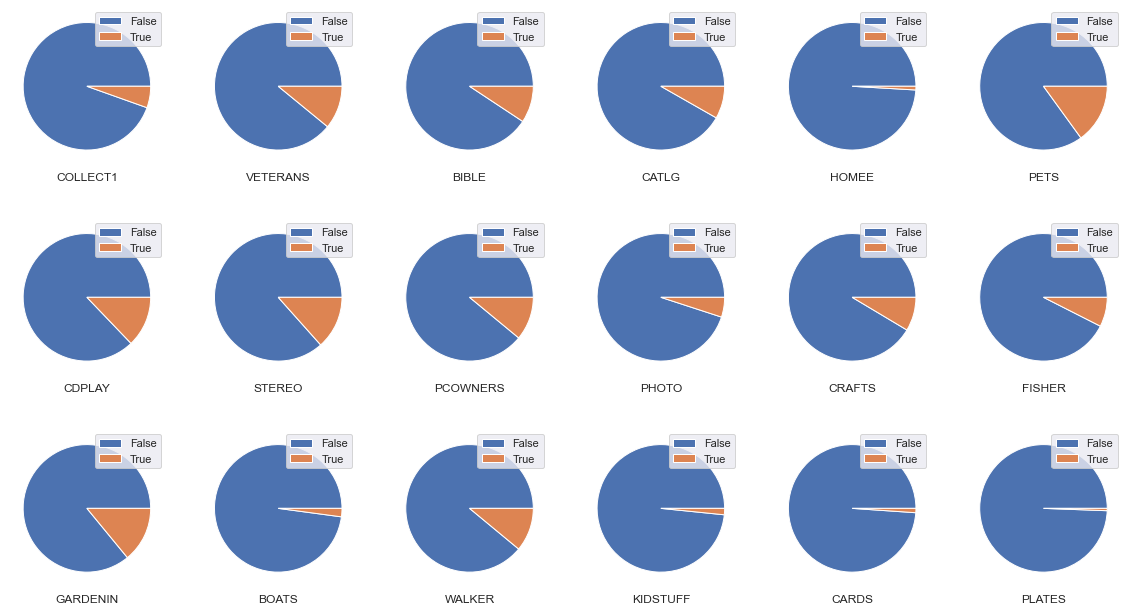

In [90]:
sns.set()

fig, axes = plt.subplots(3, ceil(len(plotdf.columns.to_list()) / 3), figsize=(20,11))

for ax, feat in zip(axes.flatten(), plotdf.columns.to_list()):
    ax.pie(plotdf[feat])
    ax.set_title(feat, y=-0.13)
    ax.legend(plotdf.index)

plt.show() 

# Donor's Gifts

In [92]:
GiftsDf = df.loc[:, ['ODATEDW','RAMNTALL','NGIFTALL','CARDGIFT','LASTGIFT','LASTDATE','FISTDATE','AVGGIFT']]

In [93]:
GiftsDf

,ODATEDW,RAMNTALL,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT
0,2009-01-01,240.0,31,14,10.0,2015-12-01,2009-11-01,7.741935
1,2014-01-01,47.0,3,1,25.0,2015-12-01,2013-10-01,15.666667
2,2010-01-01,202.0,27,14,5.0,2015-12-01,2010-01-01,7.481481
3,2007-01-01,109.0,16,7,10.0,2015-12-01,2007-02-01,6.812500
4,2006-01-01,254.0,37,8,15.0,2016-01-01,1999-03-01,6.864865
...,...,...,...,...,...,...,...,...
95407,2016-01-01,25.0,1,0,25.0,2016-02-01,2016-02-01,25.000000
95408,2016-01-01,20.0,1,0,20.0,2016-03-01,2016-03-01,20.000000
95409,2015-01-01,58.0,7,4,10.0,2016-10-01,2014-10-01,8.285714
95410,2006-01-01,498.0,41,18,18.0,2017-01-01,2006-12-01,12.146341


In [ ]:
#all numeric variables in one figure
sns.set()

gift_metricfeatures = GiftsDf[['RAMNTALL','NGIFTALL','CARDGIFT','LASTGIFT','AVGGIFT']]

#prepare figure. Create individual axes
fig, axes = plt.subplots(2, ceil(len(gift_metricfeatures) / 2), figsize=(20,13))

#plot data
for ax, feat in zip(axes.flatten(), gift_metricfeatures):
    ax.boxplot(gift_metricfeatures[feat])
    ax.set_title(feat, y=-0.13)

plt.show()

## RAMNTALL - Dollar amount of lifetime gifts to date

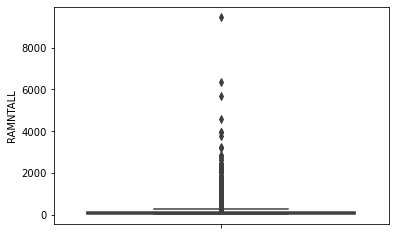

In [74]:
sns.boxplot(y =GiftsDf['RAMNTALL'])

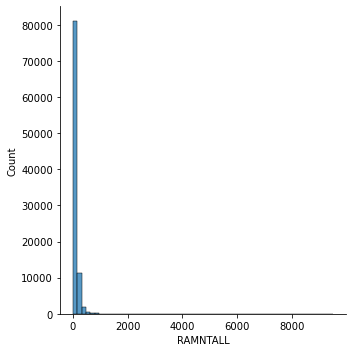

In [121]:
sns.displot(GiftsDf['RAMNTALL'],bins=60)

## AVGGIFT - Average dollar amount of gifts to date

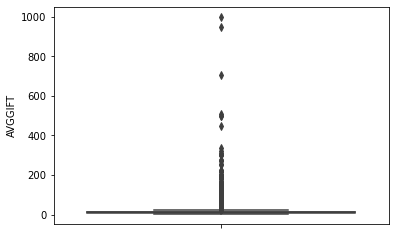

In [76]:
sns.boxplot(y =GiftsDf['AVGGIFT'])

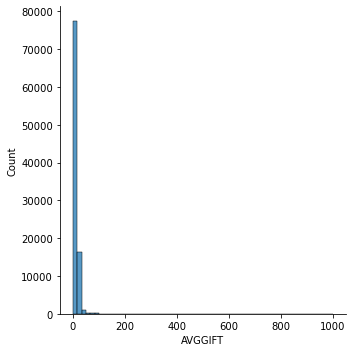

In [117]:
sns.displot(GiftsDf['AVGGIFT'],bins=60)

## NGIFTALL - Number of lifetime gifts to date

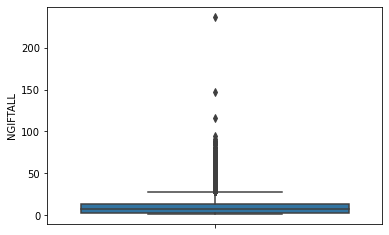

In [77]:
sns.boxplot(y =GiftsDf['NGIFTALL'])

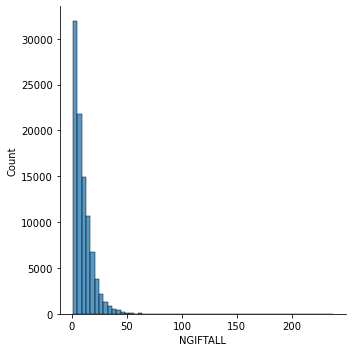

In [118]:
sns.displot(GiftsDf['NGIFTALL'],bins=60)

In [126]:
import sklearn.feature_selection 

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

NameError: name 'X_train' is not defined